<a href="https://colab.research.google.com/github/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/notebooks/brand_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/datacamp/r-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Brand Analysis Using Social Media Data in R**

Welcome to this hands-on training where you will learn how to perform brand analysis from social media data using R. We will be using different R libraries to analyze twitter data and derive insights.

In this session, you will learn

* How to compare brand popularity by extracting and comparing follower counts
* How to promote a brand by identifying popular tweets
* How to evaluate brand salience and compare the same for two brands using tweet frequencies
* Understand brand perception through text mining and by visualizing key terms
* Perform sentiment analysis to understand customer's feelings and sentiments about a brand
* Visualize brand presence by plotting tweets on the map

## **The Dataset**

The datasets to be used in this training session are in CSV format. These datasets comprise extracted live tweets using `rtweet` library. The datasets are:
* **users_twts.csv**: User data of four twitter accounts pre-extracted from Twitter
* **tesladf.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter
* **toyotadf.csv**: Tweets searched on keyword 'toyota' pre-extracted from Twitter
* **tesla_small.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter. This is a smaller dataset with fewer tweets.

* **tweets_car.csv**: Tweets searched on keyword 'electric car' pre-extracted from Twitter

Note that we will not be extracting live tweets from Twitter during this session as it invovles a setup process. We will be using pre-extracted tweets saved in RDS format.

- **users_twts.csv**: has 4 records and 90 columns of user data and associated metadata
- **tesladf.csv**: has 17979 records (tweets) and 90 columns of tweet text and associated metadata
- **toyotadf.csv**: has 17798 records (tweets) and 90 columns of tweet text and associated metadata
- **tesla_small.csv**: has 500 records (tweets) and 90 columns of tweet text and associated metadata
- **tweets_car.csv**: has 12925 records (tweets) and 90 columns of tweet text and associated metadata

All the datasets have the same set of columns and some of the important columns that we will work with are listed below:

- `user_id`: Twitter allocated unique ID for each twitter user.
- `created_at`: UTC time when this Tweet was created
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
`text`: The actual tweet text posted by an user
- `retweet_count`: Number of times a given tweet has been retweeted.
- `followers_count`: The number of followers a twitter account currently has.
- `geo_coords`, `coords_coords`, `bbox_coords`: Represents geographic location of a tweet as reported by the user or client application


## **Getting started and exploring the dataset**

In [ ]:
# Install R packages
install.packages('rtweet')
install.packages('dplyr')
install.packages('reshape')
install.packages('ggplot2')
install.packages('qdapRegex')
install.packages('tm')
install.packages('qdap')
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('syuzhet')
install.packages('maps')

## 1. Compare brand popularity by extracting and comparing follower counts

We can compare followers count for competing products by using their screen names and follower counts.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a twitter account indicates the popularity of that account and is a measure of social media influence.

In [3]:
# Load rtweet library
library(rtweet)

Create a list of users that is comprised of twitter accounts of four auto magazines.  

In [2]:
# Create a variable to store twitter account names of 4 auto magazines
users <- c("caranddriver", "motortrend", "autoweekUSA", "roadandtrack")
users

[1] "caranddriver" "motortrend"   "autoweekUSA"  "roadandtrack"

Extract user data for the 4 twitter accounts using `lookup_users()`. 

The `lookup_users()` function takes screen names as input and extracts user data for twitter accounts. 

Note: We will not be executing this function now in live environment and instead will load a CSV file pre-saved with extracted user data.

In [5]:
# Extract user data for the twitter accounts stored in users
# users_twts <- lookup_users(users)

# Save extracted data a CSV file using fwrite from data.table library
#fwrite(users_twts, file = "users_twts.csv")

Import the pre-saved CSV file with extracted user data for the four twitter accounts


---



In [6]:
# Import extracted user data from the csv file into a dataframe
users_twts = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/users_twts.csv?raw=true")

In [7]:
# View dimensions of the dataframe
dim(users_twts)

# View few rows of the dataframe
head(users_twts)

[1]  4 90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,14342661,1.272359e+18,2020-06-15T02:45:02Z,CARandDRIVER,1000-hp Hellephant-powered @Dodge Demon rolls onto dyno in video: https://t.co/fj18FvEVBl https://t.co/XyIngamybg,SocialFlow,NA,NA,NA,NA,⋯,33485,3666,2008-04-09T15:39:55Z,TRUE,http://t.co/uMTUR3UJQh,http://www.caranddriver.com,NA,https://pbs.twimg.com/profile_banners/14342661/1589386475,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/905461745178816514/goEtq5xZ_normal.jpg
2,25383000,1.271872e+18,2020-06-13T18:27:21Z,MotorTrend,Today is the day! Lights are green for the @24hoursoflemans Virtual! 🏁 🏎 Get all the LIVE coverage right here! https://t.co/GE6bAEbN3R,Twitter for iPhone,NA,NA,NA,NA,⋯,41567,2914,2009-03-19T20:53:09Z,TRUE,,,NA,https://pbs.twimg.com/profile_banners/25383000/1591290185,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1268290610642841606/tmgqtz8r_normal.jpg
3,72861485,1.272401e+18,2020-06-15T05:32:05Z,AutoweekUSA,Ford switched from Tremec to Getrag for its Mustang manual transmissions back in 2011; a new class action lawsuit c… https://t.co/8U1LTxJA8X,SocialFlow,NA,NA,NA,NA,⋯,42962,907,2009-09-09T14:14:49Z,TRUE,https://t.co/vmRBIAd2qP,http://www.autoweek.com,NA,https://pbs.twimg.com/profile_banners/72861485/1576699667,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1207392025269719041/hLqoPr0A_normal.jpg
4,21200953,1.272220e+18,2020-06-14T17:31:06Z,RoadandTrack,Watch a bunch of Safari 911s frolic through the snow on a frozen lake. https://t.co/6WacyUrnzW https://t.co/tfUAvfe0J7,SocialFlow,NA,NA,NA,NA,⋯,45268,468,2009-02-18T14:38:00Z,TRUE,http://t.co/MOF3c631Tk,http://www.roadandtrack.com,NA,https://pbs.twimg.com/profile_banners/21200953/1544480352,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/845016711292071936/ZqE0j-8u_normal.jpg


From the user data, extract details of screen names and follower counts for the 4 twitter accounts into a dataframe.

In [8]:
# Create a data frame of screen names and followers count
user_df <- users_twts[,c("screen_name","followers_count")]

In [9]:
# Display and compare the follower counts for the 4 twitter accounts
user_df

screen_name,followers_count
<fct>,<int>
CARandDRIVER,1089921
MotorTrend,739800
AutoweekUSA,164567
RoadandTrack,659062


#### We can see that "Car and Driver" is the most popular automobile magazine with number of followers exceeding a million and it is followed by "Motor Trends" with 739,800 followers. 

#### An automobile brand advertising for a new model can place its adverts on the homepage of these twitter acocunts or tag these twitter accounts while promoting its brand. 

#### Thus, Digital marketers can position ads on popular twitter accounts for increased visibility.

## 2. Promote a brand by identifying popular tweets using retweet counts

A retweet is a tweet re-shared by another user. A retweet helps utilize existing content to build a following for your brand.


The `retweet_count` column stores the number of retweets received for an original post.

The number of times a twitter text is retweeted indicates what is trending. The inputs gathered can be leveraged by promoting your brand using the popular retweets.


Let's identify the most popular tweets on Tesla based on the number of retweets received.

`search_tweets()`is a powerful function for extracting tweets based on keywords. 

We are going to use pre-extracted tweets on `tesla`, saved in CSV format, for this exercise. The steps for extracting tweets using `search_tweets()` and saving to CSV file are given below for reference. 

Note: We will not be executing this function now in live environment.

In [10]:
# Extract 18000 tweets on Tesla
#tweets_tesla = search_tweets("tesla", n = 18000, lang = "en", include_rts = FALSE)
#fwrite(tweets_tesla, "tesladf.csv")

Import the pre-saved CSV file with extracted tweets data on `tesla`

In [ ]:
# Import extracted tweets in CSV format into a dataframe
tesladf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesladf.csv?raw=true")

In [24]:
# Explore the tweet dataframe
dim(tesladf)
head(tesladf)

[1] 17979    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


Extract the columns `retweet_count` and `text` and save to a new dataframe

In [13]:
# Create a data frame of tweet text and retweet count
rtwt <- tesladf[,c("text", "retweet_count")]

# View few rows of the new dataframe
head(rtwt)

,text,retweet_count
,<fct>,<int>
1,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,0
2,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",0
3,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",0
4,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",0
5,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",0
6,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,0


Sort in descending order of the retweet counts using `arrange()` from `dplyr` library

In [14]:
# Import library
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [15]:
# Sort data frame based on descending order of retweet counts
rtwt_sort <- arrange(rtwt, desc(retweet_count))

# View sorted output
head(rtwt_sort)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


The `text` column usually contains duplicate tweets. We can retain just one version of such tweets by applying the `unique()` function on the `text` column.

This function takes two arguments:the data frame and the column `text` for removing duplicate tweets.

In [16]:
# Exclude rows with duplicate text from sorted data frame
rtwt_unique <- unique(rtwt_sort, by = "text")

View the top 6 unique tweets that got the most number of retweets according to the retweets count

In [17]:
# Print top 6 unique posts retweeted most number of times
head(rtwt_unique)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


#### The most retweeted texts have popular quotes such as "I think I want a Tesla", indicating the loyalty of Tesla fans. 

#### These tweets can be used for promoting Tesla's models and brand loyalty.

## 3.	Evaluate brand salience and compare the same for two brands using tweet frequencies

Brand salience is the extent to which a brand is spoken about for which volume of tweets posted is a strong indicator.

In this exercise, we will evalute the brand salience for Tesla by analyzing twitter data over time, popularly known as time series data analysis. 

We will also compare brand salience of Tesla against one of its competing brands, Toyota.

#### 3a) Visualizing frequency of tweets using time series plots

Time series represents a series of data points sequentially indexed over time. 
Analyzing time series data helps visualize the frequency of tweets over time.

Twitter data can help monitor engagement for a product, indicating levels of interest. Visualizing tweet frequency provides insights into this interest level.

Let's visualize tweet frequency on the automobile brand "Tesla". We will be using the tweet dataframe created for Tesla in the previous exercise.


In [18]:
# View the tweet dataframe
head(tesladf)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


In [25]:
# View the `created_at` column in the tweet dataframe
head(tesladf$created_at,10)

[1] 2020-05-18T04:36:31Z 2020-05-18T04:36:17Z 2020-05-18T04:32:08Z
 [4] 2020-05-18T03:04:49Z 2020-05-17T23:28:26Z 2020-05-18T01:47:00Z
 [7] 2020-05-18T03:14:57Z 2020-05-17T21:34:09Z 2020-05-18T04:36:16Z
[10] 2020-05-17T16:15:56Z
16725 Levels: 2020-05-16T11:04:42Z 2020-05-16T11:04:52Z ... 2020-05-18T04:36:31Z

We see that the `created_at` column has the timestamp of created time of tweets in the output.

Change the date format so it will be suppored by R for time series analysis.

To use the code multiple times, we write a function


In [35]:
# Function to change dates to a format supported by R

format.git.date <- function(datestring) {
  date <- as.POSIXct(datestring, format = "%Y-%m-%dT%H:%M:%SZ", tz = "GMT")
}

In [36]:
# Update dates in `created_at` column with the new date format
tesladf$created_at <- format.git.date(tesladf$created_at)

# View the `created_at` column again
head(tesladf$created_at, 10)

 [1] "2020-05-18 04:36:31 GMT" "2020-05-18 04:36:17 GMT"
 [3] "2020-05-18 04:32:08 GMT" "2020-05-18 03:04:49 GMT"
 [5] "2020-05-17 23:28:26 GMT" "2020-05-18 01:47:00 GMT"
 [7] "2020-05-18 03:14:57 GMT" "2020-05-17 21:34:09 GMT"
 [9] "2020-05-18 04:36:16 GMT" "2020-05-17 16:15:56 GMT"

A time series plot is used to visualize the tweet frequencies over time. 

To create a time series plot, we use `ts_plot()` from the `rtweet` library which takes 3 arguments:
the tweets data frame, the by argument to specify the time interval, and the color of the line plot.

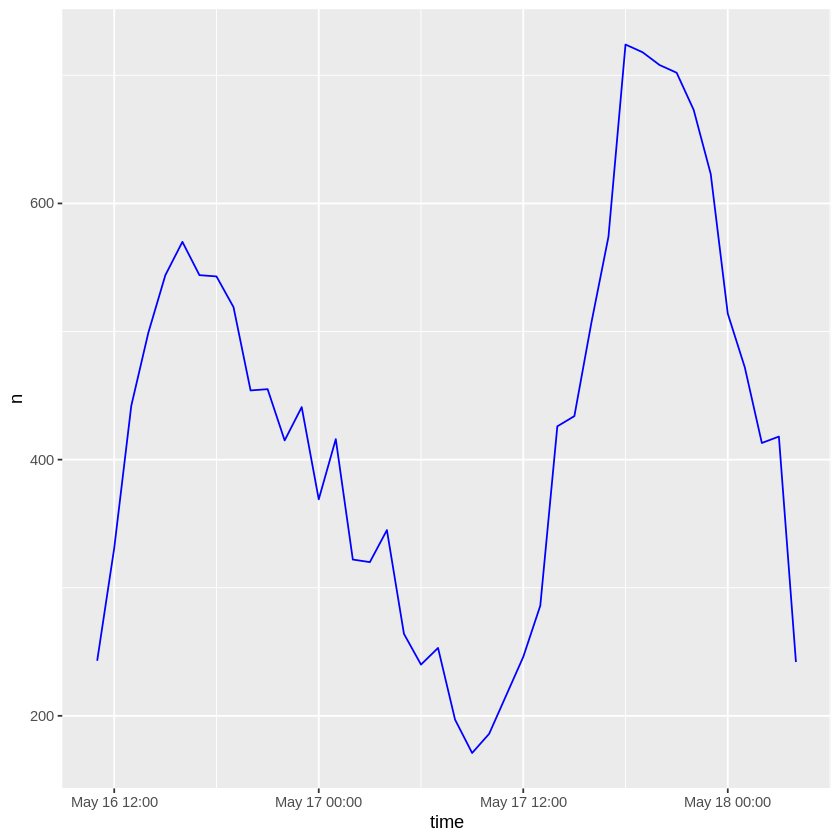

In [43]:
# Create a time series plot
ts_plot(tesladf, by = "hours", color = "blue")

We see tweets for Tesla fluctuating from high to low and then reaching a high again between 17 and 18 May after a big dip on 17 May. The high number of tweets could be related to an event or topic about Tesla's products.

#### 3b) Compare brand salience for two brands using time series plots and tweet frequencies

The volume of tweets posted for a product is a strong indicator of its brand salience. 

Now, lets compare the brand salience of Tesla and Camry using time series objects and plots.


In [ ]:
## Extract tweets for Toyota

#tweets_toyo = search_tweets("toyota", n = 18000, lang = "en", include_rts = FALSE)

#fwrite(tweets_toyo, file = "toyotadf.csv")


Import the pre-saved CSV file with extracted tweets data on `toyota`

In [45]:
# Import extracted tweets in CSV format into a dataframe
toyotadf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/toyotadf.csv?raw=true")


In [46]:
# Explore the tweet dataframe for toyota
dim(toyotadf)
head(toyotadf)

[1] 17798    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,2.914718e+07,1.26e+18,2020-05-18T05:09:56Z,LowyatNET,#Toyota Launches Its Flagship Store On @LazadaMY ; Bookings Done Via App https://t.co/X5HTc6DFx8 https://t.co/sEcdqa4K6w,TweetDeck,97,NA,NA,,⋯,46053,828,2009-04-06T04:58:33Z,TRUE,https://t.co/74yFDctZGp,http://www.lowyat.net,NA,https://pbs.twimg.com/profile_banners/29147175/1489395700,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/841210781177802752/VD5lHJw__normal.jpg
2,5.168350e+08,1.26e+18,2020-05-18T05:08:31Z,RonaldoPardede,"* RULES: * ALL WIVES OF MINE CAN START MARKETING ""SUZUKI"", MOTORS &amp; CARS, &amp; ""SUBARU"", CARS, &amp; ""ISUZU"", MOTORS &amp; CARS, &amp; ""TOYOTA"", CARS, &amp; ""HONDA"", MOTORS &amp; CARS, TO KARYS YOSEF &amp; SANTO PETRUS PEOPLE...LOVE YOU WIVES FOREVER...",Twitter for Android,258,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
3,5.168350e+08,1.26e+18,2020-05-13T09:53:36Z,RonaldoPardede,"* NY. SHUI SUI PARDEDE ONE (150 CM), ""CMO"" CHIEF MARKETING OFFICER, CAN TALK TO INSURANCE COMPANY ""AIA"" OR TO CARS COMPANIES ""FORD"" &amp; ""LINCOLN"" &amp; ""HONDA"" &amp; ""TOYOTA"" FOR MARKETING OUR PRODUCTS...WE CAN HAVE BONUS &amp; PAYCHECKS &amp; SERVICE FEES FOR MARKETING OUR COMPANIES' PRODUCTS.",Twitter for Android,297,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
4,3.266185e+09,1.26e+18,2020-05-18T05:08:04Z,DaOtherShip,@StillJustDave You going to start charging Toyota rent for living in your head like that? 😂😂,Twitter for iPhone,77,1.26e+18,1.220000e+18,StillJustDave,⋯,15957,95015,2015-07-02T16:59:08Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/3266185284/1453081985,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1224826150146449408/G-LTikOh_normal.jpg
5,1.050000e+18,1.26e+18,2020-05-18T05:07:59Z,itsvantime,"@Twonius I dunno, though I think it’ll be hard to top the styling of the outgoing generation (pre-facelifts), some of Toyota’s bread and butter has been looking pretty decent lately (new Highlander), so there’s some hope...",Twitter for iPhone,214,1.26e+18,9.931703e+08,Twonius,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg
6,1.050000e+18,1.26e+18,2020-05-17T19:34:43Z,itsvantime,New Sienna tomorrow (we guess that leaked slide was on the money. Now... will there be a Sienna Prime? Hope so!) https://t.co/AaSuJe44e8,Twitter for iPhone,112,NA,NA,,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg


We can see the extracted tweets on `toyota` and the `created_at` column has the timestamp.

Change the date format for Toyota similar to what we did with Tesla's dataframe.

In [48]:
# Update dates in `created_at` column with the new date format
toyotadf$created_at <- format.git.date(toyotadf$created_at)

# View the `created_at` column again
head(toyotadf$created_at, 10)

 [1] "2020-05-18 05:09:56 GMT" "2020-05-18 05:08:31 GMT"
 [3] "2020-05-13 09:53:36 GMT" "2020-05-18 05:08:04 GMT"
 [5] "2020-05-18 05:07:59 GMT" "2020-05-17 19:34:43 GMT"
 [7] "2020-05-18 05:07:49 GMT" "2020-05-13 09:02:07 GMT"
 [9] "2020-05-13 09:18:42 GMT" "2020-05-18 05:07:31 GMT"


A time series object contains the aggregated frequency of tweets over a specified time interval. Creating time series objects is the first step before visualizing tweet frequencies for comparison. 

We create time series object for Tesla using the `ts_data()` function. The output from this function has two columns comprising time and tweet frequencies.


In [49]:
# Create a time series object for Tesla at hourly intervals
tesla_ts <- ts_data(tesladf, by ='hours')

# View the time series object
head(tesla_ts)

time,n
<dttm>,<int>
2020-05-16 11:00:00,243
2020-05-16 12:00:00,331
2020-05-16 13:00:00,442
2020-05-16 14:00:00,499
2020-05-16 15:00:00,544
2020-05-16 16:00:00,570


In [50]:
# Rename the two columns in the time series object
names(tesla_ts) <- c("time", "tesla_n")

# View the output
head(tesla_ts)

time,tesla_n
<dttm>,<int>
2020-05-16 11:00:00,243
2020-05-16 12:00:00,331
2020-05-16 13:00:00,442
2020-05-16 14:00:00,499
2020-05-16 15:00:00,544
2020-05-16 16:00:00,570


We can see the column with the hourly time intervals is now named as `time` and the corresponding aggregated tweet counts as `tesla_n`

Create a similar time series object for Toyota and rename the two columns

In [51]:
# Create a time series object for Toyota at hourly intervals
toyo_ts <- ts_data(toyotadf, by ='hours')

# Rename the two columns in the time series object
names(toyo_ts) <- c("time", "toyo_n")

# View the output
head(toyo_ts)

time,toyo_n
<dttm>,<int>
2020-05-12 04:00:00,27
2020-05-12 05:00:00,87
2020-05-12 06:00:00,94
2020-05-12 07:00:00,162
2020-05-12 08:00:00,121
2020-05-12 09:00:00,116


We now have two time series objects with columns for time and tweet frequencies.

Merge the objects into a single data frame using the `merge()` function which is from the `reshape` library.

In [52]:
# Load the required libraries
library(reshape)
library(ggplot2)


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




The `merge()` function takes 3 arguments:

the time series objects to be merged, 

`by` argument which specifies the common column for merging,

`all` argument to instruct whether all the rows should be included.

In [53]:
# Merge the time series objects with "time" as the common column
merged_df <- merge(tesla_ts, toyo_ts, by = "time", all = TRUE)

# View few rows of the merged dataframe
head(merged_df)

,time,tesla_n,toyo_n
,<dttm>,<int>,<int>
1,2020-05-12 04:00:00,NA,27
2,2020-05-12 05:00:00,NA,87
3,2020-05-12 06:00:00,NA,94
4,2020-05-12 07:00:00,NA,162
5,2020-05-12 08:00:00,NA,121
6,2020-05-12 09:00:00,NA,116


We can see the tweet frqeuencies for tesla and toyota in separate columns.

Stack the tweet frequency counts into a single column and brands into another column using `melt()` from 'reshape` library.

The melt() function takes 3 arguments:

the dataframe to melt, `na.rm` to specify whether to include or exclude rows with missing values and `id.vars` to specify the source columns to be retained (`time` in this case).

In [54]:
# Stack the tweet frequency columns
melt_df <- melt(merged_df, na.rm = TRUE, id.vars = "time")

# View the output
head(melt_df)

,time,variable,value
,<dttm>,<fct>,<int>
1,2020-05-16 11:00:00,tesla_n,243
2,2020-05-16 12:00:00,tesla_n,331
3,2020-05-16 13:00:00,tesla_n,442
4,2020-05-16 14:00:00,tesla_n,499
5,2020-05-16 15:00:00,tesla_n,544
6,2020-05-16 16:00:00,tesla_n,570


We can see that all columns other than `time` have been stacked and we have three columns now: `time`, `variable`, `value`. 

Plot the frequency of tweets on Tesla and Toyota using `ggplot()`.

Set the relevant column names i.e.  as values for the x-axis, y-axis, and color of the plot.  

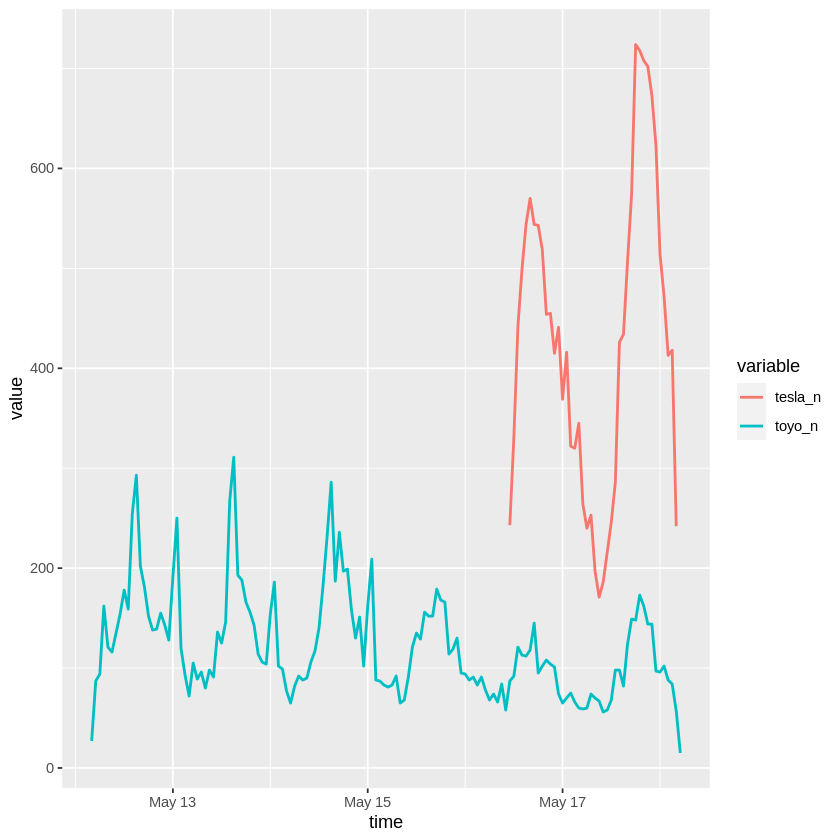

In [55]:
## Compare brand salience by plotting the frequency of tweets

# Plot frequency of tweets on Tesla and Toyota
ggplot(data = melt_df, aes(x = time, y = value, col = variable))+
  geom_line(lwd = 0.8)

#### It's interesting to see that there are relatively more tweets on Tesla than on Toyota. 

#### The higher level of tweet activity for Tesla indicates a stronger brand salience for Tesla than Toyota. 

#### Visualizing tweets through time series analysis provides good insights on interest level on a product and can be used to compare brand salience.

## 4. Understand brand perception through text mining and by visualizing key terms



The exercises we have done so far are to do with analyzing the metadata around tweets. 

In this exercise, we will analyze the tweet text itself to derive direct insights on user opinions. The two broad steps are:

1) Perform text mining by processing the twitter text using various steps.

2) Visualize key terms in the processed text to understand brand perception.



### 4a) Text mining by processing twitter text

Tweet text is unstructured, noisy, and raw. It contains emoticons, URLs, and numbers that have to be removed before it is analyzed for reliable results.

Steps involved in processing tweet text:

1) Remove redundant information which includes URLs, special characters, punctuation, and numbers.

2) Convert the text to a Corpus.

3) Convert all letters in the text to lower case.

4) Remove common words, also called stop words, from the corpus.

5) Remove custom stop words from the corpus.

First, extract the tweets stored in the `text` column of the tweet dataframe for Tesla.

In [ ]:
# Extract tweet text from the Tesla dataset
twt_txt <- tesladf$text
head(twt_txt, 15)

[1] @BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.                                                                                                                                                                                                                     
 [2] @TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old.  He not only was an investor, he built the company.\n\nBTW, do you even know what “B shares” are?                                                                                                                                  
 [3] @TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies.\n\nMusk is famously known to be an obsessed workaholic.  *That* has more to do with his success than anything else.\n\nYou sound petty, jealous and small.  When you accomplish what he accomplished, then you can bitch an moan.
 [4] @Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move.\n\nBut if they do it will be because Musk thought it would be a positive.  Further, the new location will employ lots of new people.\n\nAlameda county isn’t the only place in the U.S. that needs jobs.                                         
 [5] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing.\n\nDoesn’t seem to be an issue.                                                                       
 [6] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof?  Are Alameda people more important than people elsewhere?\n\nTesla could help those people.                                                          
 [7] @Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Are people not mobile?  Can they not move to a new Tesla location?  Or does California prohibit people from leaving?  I’ve lived all over the place and am richer for the experience.\n\nReally narrow comment you made there.                                     
 [8] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk It’s a legal issue.  Does Tesla have to obey an unelected county health official?  \n\nI’m not a lawyer.  The county (or Tesla) has a right to take this to court for clarification.\n\nIn any event, the County cleared the way for Tesla to open.                
 [9] @teslaP3D @elonmusk @Tesla 4 doors minimum. It’s nice, add 2 doors.                                                                                                                                                                                                                                                     
[10] @StevenZWang @vincent13031925 I hope so. But I am not sure it will happen right away. At least there are stores and service here in Texas. And a huge amount of Tesla’s in the state. OK does not allow stores or service centers. Texas is the 3rd largest auto sales state in the US. 18% of trucks are here!!🤠🤠🤠     
[11] This article says VW beat Tesla in Norway?? Not true??56% of Norway's new cars had a plug in 2019, Tesla Model 3 overall best-seller https://t.co/RhYKbt7kHT via @electrekco @tesla @elonmusk                                                                                                                           
[12] @JenniPlaster @vincent13031925 @Tesla @elonmusk Texas                                                                                                                                                                                                                                                                   
[13] @ElonMuskNewsOrg Oklahoma doesn’t allow Tesla stores, or service centers in the state. At least Texas allows stores and service centers. Texas has 18% of all trucks in the US. We s

We can see the first few rows of tweet text extracted from the main dataframe.

#### i) Remove URLs and characters other than letters

Use the `rm_twitter_url()` function from the `qdapRegex` library to remove all URLs from the text.

`rm_twitter_url()` takes the tweet text dataframe as input.

In [ ]:
# Load the library
library(qdapRegex)

In [ ]:
# Remove URLs from the tweet text and view the output
twt_txt_url <- rm_twitter_url(twt_txt)

# View few rows of the dataframe
head(twt_txt_url, 15)

[1] "@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99."                                                                                                                                                                                                                
 [2] "@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?"                                                                                                                                 
 [3] "@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan."   
 [4] "@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs."                                           
 [5] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue."                                                                     
 [6] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people."                                                         
 [7] "@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Are people not mobile? Can they not move to a new Tesla location? Or does California prohibit people from leaving? I’ve lived all over the place and am richer for the experience. Really narrow comment you made there."                                      
 [8] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk It’s a legal issue. Does Tesla have to obey an unelected county health official? I’m not a lawyer. The county (or Tesla) has a right to take this to court for clarification. In any event, the County cleared the way for Tesla to open."                     
 [9] "@teslaP3D @elonmusk @Tesla 4 doors minimum. It’s nice, add 2 doors."                                                                                                                                                                                                                                                
[10] "@StevenZWang @vincent13031925 I hope so. But I am not sure it will happen right away. At least there are stores and service here in Texas. And a huge amount of Tesla’s in the state. OK does not allow stores or service centers. Texas is the 3rd largest auto sales state in the US. 18% of trucks are here!!🤠🤠🤠"
[11] "This article says VW beat Tesla in Norway?? Not true??56% of Norway's new cars had a plug in 2019, Tesla Model 3 overall best-seller via @electrekco @tesla @elonmusk"                                                                                                                                              
[12] "@JenniPlaster @vincent13031925 @Tesla @elonmusk Texas"                                                                                                                                                                                                                                                              
[13] "@ElonMuskNewsOrg Oklahoma doesn’t allow Tesla stores, or service centers in the state. At least Texas allows stores and service centers. Texas has 18% of all trucks in the US. We sell 450,000 vehicles per year. No s

The URLs are removed from tweets: check records starting with "This article says VW beat Tesla..." and "Anyone up for some..." for example.

#### ii) Replace special characters, punctuations and numbers

The next step is to remove special characters, punctuation, and numbers using the `gsub()` function.

`gsub()` takes 3 arguments: 

the pattern to search, the character to replace with, and the text source. In this case, the instruction is to replace all characters except "A to Z" and "a to z" with a space.


In [ ]:
# Replace special characters, punctuation, & numbers with spaces
twt_txt_chrs  <- gsub("[^A-Za-z]"," " , twt_txt_url)

# View text after replacing special characters, punctuation, & numbers
head(twt_txt_chrs, 15)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                                
 [2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                                 
 [3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "   
 [4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                           
 [5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                     
 [6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "                                                         
 [7] " Miss Violet      jamison casper  ThomboyD  elonmusk Are people not mobile  Can they not move to a new Tesla location  Or does California prohibit people from leaving  I ve lived all over the place and am richer for the experience  Really narrow comment you made there "                                      
 [8] " jamison casper  Miss Violet      ThomboyD  elonmusk It s a legal issue  Does Tesla have to obey an unelected county health official  I m not a lawyer  The county  or Tesla  has a right to take this to court for clarification  In any event  the County cleared the way for Tesla to open "                     
 [9] " teslaP D  elonmusk  Tesla   doors minimum  It s nice  add   doors "                                                                                                                                                                                                                                                
[10] " StevenZWang  vincent         I hope so  But I am not sure it will happen right away  At least there are stores and service here in Texas  And a huge amount of Tesla s in the state  OK does not allow stores or service centers  Texas is the  rd largest auto sales state in the US      of trucks are here     "
[11] "This article says VW beat Tesla in Norway   Not true      of Norway s new cars had a plug in       Tesla Model   overall best seller via  electrekco  tesla  elonmusk"                                                                                                                                              
[12] " JenniPlaster  vincent          Tesla  elonmusk Texas"                                                                                                                                                                                                                                                              
[13] " ElonMuskNewsOrg Oklahoma doesn t allow Tesla stores  or service centers in the state  At least Texas allows stores and service centers  Texas has     of all trucks in the US  We sell         vehicles per year  No s

In the output, we can see that all content other than letters has been replaced with spaces.

#### iii)  Build a corpus

Convert the text to a corpus using the `tm` library.

A corpus is a list of text documents and is the starting point for various text processing functions.


In [ ]:
# Load libraries
library(tm)
#library(dplyr)

Loading required package: NLP



Two step process:

1) Input the tweet_text as an argument to the VectorSource() function. 
This function converts the tweet text to a vector of texts. A vector is a sequence of elements of the same data type.

2) This vector is next converted to a corpus using the Corpus() function. 

In [ ]:
# Convert processed text to a text corpus and view output
twt_corpus <- twt_txt_chrs %>% 
                VectorSource() %>% 
                Corpus() 

# View the content column in the corpus
head(twt_corpus$content, 15)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                                
 [2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                                 
 [3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "   
 [4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                           
 [5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                     
 [6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "                                                         
 [7] " Miss Violet      jamison casper  ThomboyD  elonmusk Are people not mobile  Can they not move to a new Tesla location  Or does California prohibit people from leaving  I ve lived all over the place and am richer for the experience  Really narrow comment you made there "                                      
 [8] " jamison casper  Miss Violet      ThomboyD  elonmusk It s a legal issue  Does Tesla have to obey an unelected county health official  I m not a lawyer  The county  or Tesla  has a right to take this to court for clarification  In any event  the County cleared the way for Tesla to open "                     
 [9] " teslaP D  elonmusk  Tesla   doors minimum  It s nice  add   doors "                                                                                                                                                                                                                                                
[10] " StevenZWang  vincent         I hope so  But I am not sure it will happen right away  At least there are stores and service here in Texas  And a huge amount of Tesla s in the state  OK does not allow stores or service centers  Texas is the  rd largest auto sales state in the US      of trucks are here     "
[11] "This article says VW beat Tesla in Norway   Not true      of Norway s new cars had a plug in       Tesla Model   overall best seller via  electrekco  tesla  elonmusk"                                                                                                                                              
[12] " JenniPlaster  vincent          Tesla  elonmusk Texas"                                                                                                                                                                                                                                                              
[13] " ElonMuskNewsOrg Oklahoma doesn t allow Tesla stores  or service centers in the state  At least Texas allows stores and service centers  Texas has     of all trucks in the US  We sell         vehicles per year  No s

The text is stored under `content` within the corpus just created.

#### iv)  Convert corpus to lowercase

When we analyze text, we want to ensure that a word is not counted as two different words because the case is different in the two instances.

Hence, we change all the words to lowercase using `tm_map()`. 

This function takes the tweet corpus and `tolower()` as arguments. `tolower()` converts upper-case characters in a character vector to lower-case.

In [ ]:
# Convert the corpus to lowercase
twt_corpus_lwr <- tm_map(twt_corpus, tolower) 

# View the corpus after converting to lowercase
head(twt_corpus_lwr$content, 15)

Warning message in tm_map.SimpleCorpus(twt_corpus, tolower):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff  had to get the brand name fancy stuff  mine is       "                                                                                                                                                                                                                
 [2] " trevsully  thomboyd  elonmusk btw  musk bought into tesla when it was one year old  he not only was an investor  he built the company  btw  do you even know what  b shares  are "                                                                                                                                 
 [3] " trevsully  thomboyd  elonmusk he bought tesla and built a handful of other companies  musk is famously known to be an obsessed workaholic   that  has more to do with his success than anything else  you sound petty  jealous and small  when you accomplish what he accomplished  then you can bitch an moan "   
 [4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move  but if they do it will be because musk thought it would be a positive  further  the new location will employ lots of new people  alameda county isn t the only place in the u s  that needs jobs "                                           
 [5] " jamison casper  miss violet      thomboyd  elonmusk i believe the county approved tesla s covid    prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  doesn t seem to be an issue "                                                                     
 [6] " jamison casper  miss violet      thomboyd  elonmusk what about other areas of the country where people are struggling and unemployment is going through the roof  are alameda people more important than people elsewhere  tesla could help those people "                                                         
 [7] " miss violet      jamison casper  thomboyd  elonmusk are people not mobile  can they not move to a new tesla location  or does california prohibit people from leaving  i ve lived all over the place and am richer for the experience  really narrow comment you made there "                                      
 [8] " jamison casper  miss violet      thomboyd  elonmusk it s a legal issue  does tesla have to obey an unelected county health official  i m not a lawyer  the county  or tesla  has a right to take this to court for clarification  in any event  the county cleared the way for tesla to open "                     
 [9] " teslap d  elonmusk  tesla   doors minimum  it s nice  add   doors "                                                                                                                                                                                                                                                
[10] " stevenzwang  vincent         i hope so  but i am not sure it will happen right away  at least there are stores and service here in texas  and a huge amount of tesla s in the state  ok does not allow stores or service centers  texas is the  rd largest auto sales state in the us      of trucks are here     "
[11] "this article says vw beat tesla in norway   not true      of norway s new cars had a plug in       tesla model   overall best seller via  electrekco  tesla  elonmusk"                                                                                                                                              
[12] " jenniplaster  vincent          tesla  elonmusk texas"                                                                                                                                                                                                                                                              
[13] " elonmusknewsorg oklahoma doesn t allow tesla stores  or service centers in the state  at least texas allows stores and service centers  texas has     of all trucks in the us  we sell         vehicles per year  no s

All characters in the corpus are now converted to lowercase.

#### v) Remove stop words from the Corpus

Stop words are commonly used words like a, an, and but. Such words need to be removed to focus on the important words in the corpus.

`stopwords()` from the `tm` library has a list of default English stop words.

Remove the default English stop words from our corpus using the `removeWords()` function available in `tm_map()`. 

`tm_map()` takes 3 arguments:
the corpus, `removeWords()`, and `stopwords()` with "english" as its value.


In [ ]:
# Remove English stop words from the corpus and view the corpus
twt_corpus_stpwd <- tm_map(twt_corpus_lwr, removeWords, stopwords("english"))

# View the content column
head(twt_corpus_stpwd$content, 15)

Warning message in tm_map.SimpleCorpus(twt_corpus_lwr, removeWords, stopwords("english")):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff    get  brand name fancy stuff  mine        "                                                                                                                                                   
 [2] " trevsully  thomboyd  elonmusk btw  musk bought  tesla    one year old       investor   built  company  btw    even know   b shares   "                                                                                                      
 [3] " trevsully  thomboyd  elonmusk  bought tesla  built  handful   companies  musk  famously known    obsessed workaholic           success  anything else   sound petty  jealous  small    accomplish   accomplished    can bitch  moan "       
 [4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move       will   musk thought     positive     new location will employ lots  new people  alameda county isn t   place   u s   needs jobs "                                
 [5] " jamison casper  miss violet      thomboyd  elonmusk  believe  county approved tesla s covid    prevention plan  subject   additional requirements   will    police  enforce safe distancing  doesn t seem    issue "                        
 [6] " jamison casper  miss violet      thomboyd  elonmusk    areas   country  people  struggling  unemployment  going   roof   alameda people  important  people elsewhere  tesla  help  people "                                                 
 [7] " miss violet      jamison casper  thomboyd  elonmusk  people  mobile  can   move   new tesla location    california prohibit people  leaving   ve lived    place   richer   experience  really narrow comment  made  "                       
 [8] " jamison casper  miss violet      thomboyd  elonmusk  s  legal issue   tesla   obey  unelected county health official   m   lawyer   county   tesla    right  take   court  clarification    event   county cleared  way  tesla  open "      
 [9] " teslap d  elonmusk  tesla   doors minimum   s nice  add   doors "                                                                                                                                                                           
[10] " stevenzwang  vincent          hope       sure  will happen right away   least   stores  service   texas    huge amount  tesla s   state  ok   allow stores  service centers  texas    rd largest auto sales state   us       trucks       " 
[11] " article says vw beat tesla  norway    true       norway s new cars   plug        tesla model   overall best seller via  electrekco  tesla  elonmusk"                                                                                        
[12] " jenniplaster  vincent          tesla  elonmusk texas"                                                                                                                                                                                       
[13] " elonmusknewsorg oklahoma doesn t allow tesla stores   service centers   state   least texas allows stores  service centers  texas        trucks   us   sell         vehicles per year   state taxes  lots  unemployed oil  gas people      "
[14] "anyone    bullshit  investopedia  lies  lies  lies      elonmusk  tesla   big risks  investing  tesla stock via  investopedia"                                                                                                               
[15] " thirdrowtesla  teslaownerssv  eliburton   tesla truth  tesla raj  teslatunity let s move forward   actions speak louder  words     need  take  deep breath  respond  things written   react          "

The common stop words are now removed from the corpus.

#### vi) Remove additional spaces from the Corpus

The additional spaces created in the previous processing steps need to be removed to create a clean corpus.

The additional spaces are removed using `tm_map()` which takes two arguments: 

the corpus and the function `stripWhitespace()` which collapses multiple spaces to a single space.

In [ ]:
# Remove additional spaces from the corpus
twt_corpus_stpwd2 <- tm_map(twt_corpus_stpwd, stripWhitespace)

# View the text corpus after removing spaces
head(twt_corpus_stpwd2$content, 15)

Warning message in tm_map.SimpleCorpus(twt_corpus_stpwd, stripWhitespace):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                             
 [2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                         
 [3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "      
 [4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                          
 [5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "            
 [6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "                                     
 [7] " miss violet jamison casper thomboyd elonmusk people mobile can move new tesla location california prohibit people leaving ve lived place richer experience really narrow comment made "                
 [8] " jamison casper miss violet thomboyd elonmusk s legal issue tesla obey unelected county health official m lawyer county tesla right take court clarification event county cleared way tesla open "      
 [9] " teslap d elonmusk tesla doors minimum s nice add doors "                                                                                                                                               
[10] " stevenzwang vincent hope sure will happen right away least stores service texas huge amount tesla s state ok allow stores service centers texas rd largest auto sales state us trucks "                
[11] " article says vw beat tesla norway true norway s new cars plug tesla model overall best seller via electrekco tesla elonmusk"                                                                           
[12] " jenniplaster vincent tesla elonmusk texas"                                                                                                                                                             
[13] " elonmusknewsorg oklahoma doesn t allow tesla stores service centers state least texas allows stores service centers texas trucks us sell vehicles per year state taxes lots unemployed oil gas people "
[14] "anyone bullshit investopedia lies lies lies elonmusk tesla big risks investing tesla stock via investopedia"                                                                                            
[15] " thirdrowtesla teslaownerssv eliburton tesla truth tesla raj teslatunity let s move forward actions speak louder words need take deep breath respond things written react "

The additional spaces are now removed from the corpus.

#### vii) Remove custom stop words from the Corpus

In the corpus, frequently appearing terms like `tesla`, `sure`, `can`, `will`  etc do not add any value to the corpus. Such terms need to be removed to create a meaningul, refined corpus that can be used for anlaysis.

To do this, first extract a list of most frequent terms in the Corpus and use this list to remove the frequently occuring custom stop words.


The first step is to extract the number of occurrences of each word, called term frequency, using the `freq_terms()` function from the `qdap` library.

In [ ]:
# Load the library qdap
library(qdap)

The `freq_terms()` function takes two arguments: the corpus and the top "n" terms to be extracted based on the number of occurrences.

Let's extract term frequencies for top 60 words in the Corpus.

In [ ]:
# Extract term frequencies for top 60 words in the Corpus
termfreq  <-  freq_terms(twt_corpus_final, 60)

# View the output
termfreq

,WORD,FREQ
,<chr>,<dbl>
24925,tesla,19035
21723,s,5543
7873,elonmusk,4791
24513,t,2851
27825,will,1709
7863,elon,1583
3587,can,1569
14493,like,1538
13362,just,1389


We can see high frequencies for custom stop words like `tesla`, `s`, `t`, `elon` (`elon musk` is retained).

Create of vector of such high frequency custom stop words.

In [ ]:
# Create a vector of custom stop words
custom_stopwds <- c("tesla", "s", "t", "will", "elon", "can", "like", 
				"just", "musk", "one", "m",  "get", "now", "cars", "amp", 
                "re", "go", "even", "via")

Apply `tm_map()` and `removeWords()` functions on the corpus to remove the custom stop words.

`tm_map()` takes 3 arguments: the corpus, removeWords(), and the vector of custom stop words.

In [ ]:
# Remove custom stop words and create a refined corpus
corp_refined <- tm_map(twt_corpus_final, removeWords, custom_stopwds)

# View the text corpus after removing custom stop words
head(twt_corpus_final$content, 15)

Warning message in tm_map.SimpleCorpus(twt_corpus_final, removeWords, custom_stopwds):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                             
 [2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                         
 [3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "      
 [4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                          
 [5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "            
 [6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "                                     
 [7] " miss violet jamison casper thomboyd elonmusk people mobile can move new tesla location california prohibit people leaving ve lived place richer experience really narrow comment made "                
 [8] " jamison casper miss violet thomboyd elonmusk s legal issue tesla obey unelected county health official m lawyer county tesla right take court clarification event county cleared way tesla open "      
 [9] " teslap d elonmusk tesla doors minimum s nice add doors "                                                                                                                                               
[10] " stevenzwang vincent hope sure will happen right away least stores service texas huge amount tesla s state ok allow stores service centers texas rd largest auto sales state us trucks "                
[11] " article says vw beat tesla norway true norway s new cars plug tesla model overall best seller via electrekco tesla elonmusk"                                                                           
[12] " jenniplaster vincent tesla elonmusk texas"                                                                                                                                                             
[13] " elonmusknewsorg oklahoma doesn t allow tesla stores service centers state least texas allows stores service centers texas trucks us sell vehicles per year state taxes lots unemployed oil gas people "
[14] "anyone bullshit investopedia lies lies lies elonmusk tesla big risks investing tesla stock via investopedia"                                                                                            
[15] " thirdrowtesla teslaownerssv eliburton tesla truth tesla raj teslatunity let s move forward actions speak louder words need take deep breath respond things written react "

You can see that the corpus now has only important terms as the common and user-defined custom stop words have been removed.

Check the frequently occuring top 60 words again to see if we get a different list.

In [ ]:
# Extract term frequencies for the top 60 words
termfreq_clean <- freq_terms(corp_refined, 60)

# View the output
termfreq_clean

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


### 4b) Understand brand perception by visualizing key terms in the corpus

The most frequently used words in tweets are typically popular terms relevant to the topic tweeted.

In this exercise, we will extract and visualize popular terms in our refined corpus using the bar plot and word cloud.


#### i) Identify top 15 words spoken about the brand

Let's extract and view the term frequency for the top 15 words from this refined corpus.

In [ ]:
# Extract term frequencies for the top 15 words
termfreq_15w <- freq_terms(corp_refined, 15)
termfreq_15w

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


The popular terms related to tweets on Tesla can be seen here.

The brand promotion team can analyze these terms to understand the pulse of the audience.



#### ii) Visualize popular terms with bar plots

Bar plots help summarize popular terms in an easily interpretable visual form.

Create a bar plot of terms that occur more than 60 times using `ggplot()`

The first step is to create a subset dataframe of the terms that occur more than 60 times using the `subset()` function which takes two arguments:

the frequent terms list and the condition `FREQ` column greater than `60`.


In [ ]:
# Identify terms with more than 60 counts from the top 15 list
term60 <- subset(termfreq_15w, FREQ > 60)
term60

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


Create a bar plot with words sorted in descending order of FREQ column for the x-axis and their frequency counts for the y-axis

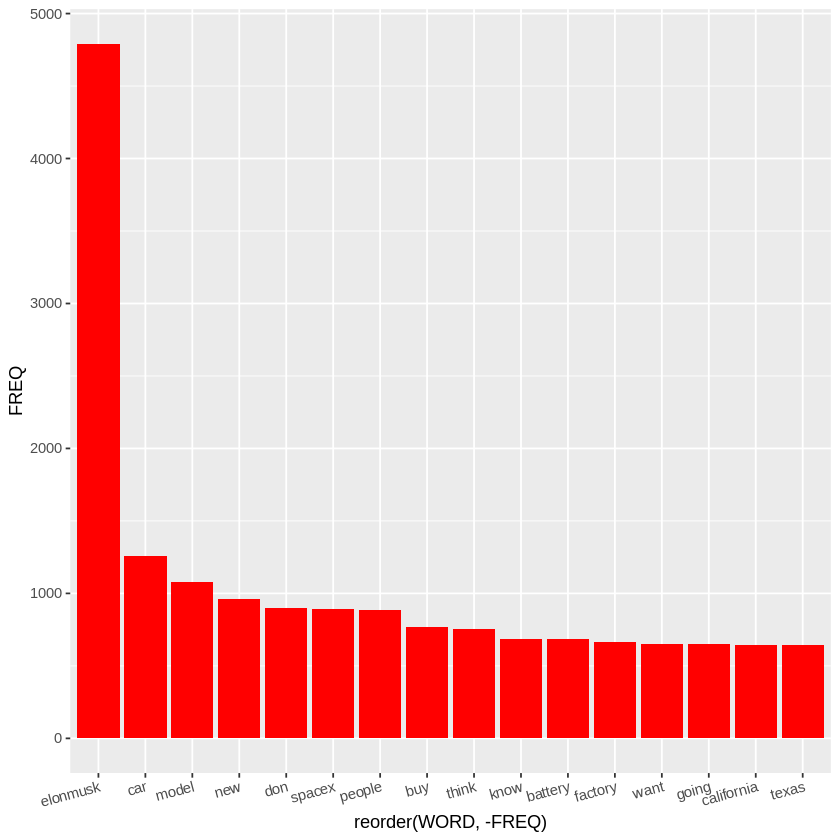

In [ ]:
# Create a bar plot using terms with more than 60 counts
ggplot(term60, aes(x = reorder(WORD, -FREQ), y = FREQ)) + 
		geom_bar(stat = "identity", fill = "red") + 
		theme(axis.text.x = element_text(angle = 15, hjust = 1))

We can 'elonmusk' as the most popular word followed by related words like car, model, new, don and spacex. 

There is some discussion about battery of their electric car as well and also their location cities California and Texas.

Bar plots quickly help summarize these popular terms in an easily interpretable form.

#### ii) Visualize popular terms with word clouds

A word cloud is an image made up of words in which the size of each word indicates its frequency.


To create word clouds, we use the `wordcloud()` function from the `wordcloud` library. 

The `RColorBrewer` library provides some interesting color palettes to work with.

In [ ]:
# Load libraries
library(wordcloud)
library(RColorBrewer)

The `wordcloud()` function takes the following arguments:

the corpus, `min.freq` set to include only terms with a minimum frequency, `color` set to "red", `scale` set to the range of font sizes, and `random.order` set to FALSE to fix the word pattern in the word cloud.

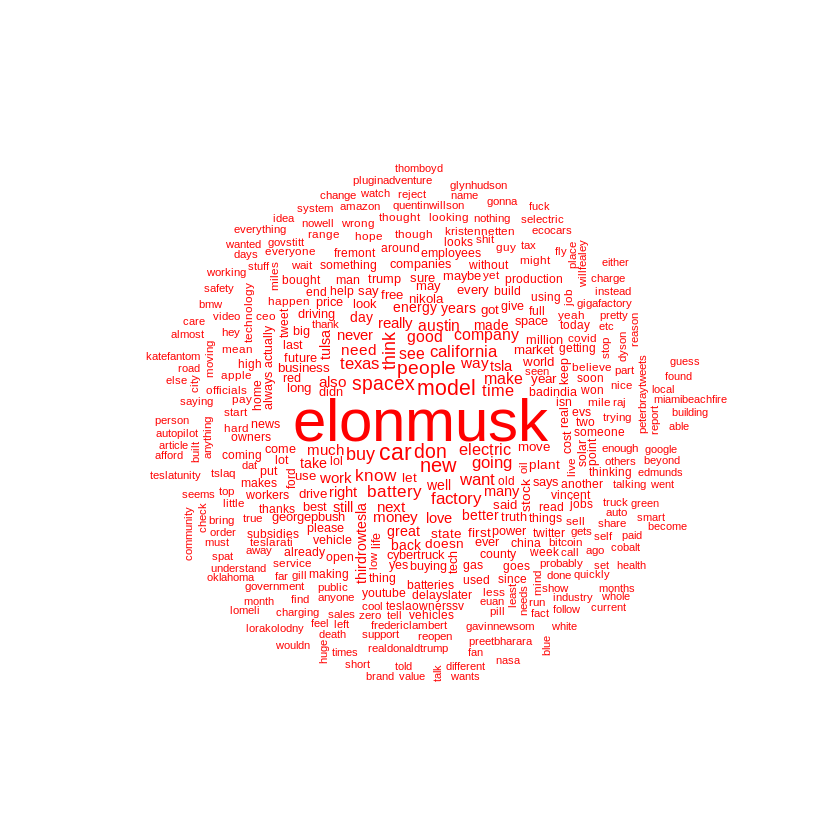

In [ ]:
# Create a word cloud in red with min frequency of 100
wordcloud(corp_refined, min.freq = 100, colors = "red", 
          scale = c(3,0.5),random.order = FALSE)

A word cloud highlighting high-frequency words in large font sizes is displayed as output.

We can see that 'elonmusk' stands out as the most popular term. Also, similar to what we saw with the bar plot, terms like 'car', 'buy', 'spacex' are the other popular ones.

We can choose a color palette from the `RColorBrewer` library to make the word cloud colorful.

Assign "6" colors from the “Dark2” palette of `brewer.pal()` and set the `max.words` argument to "50" to plot a word cloud of the top 50 words.

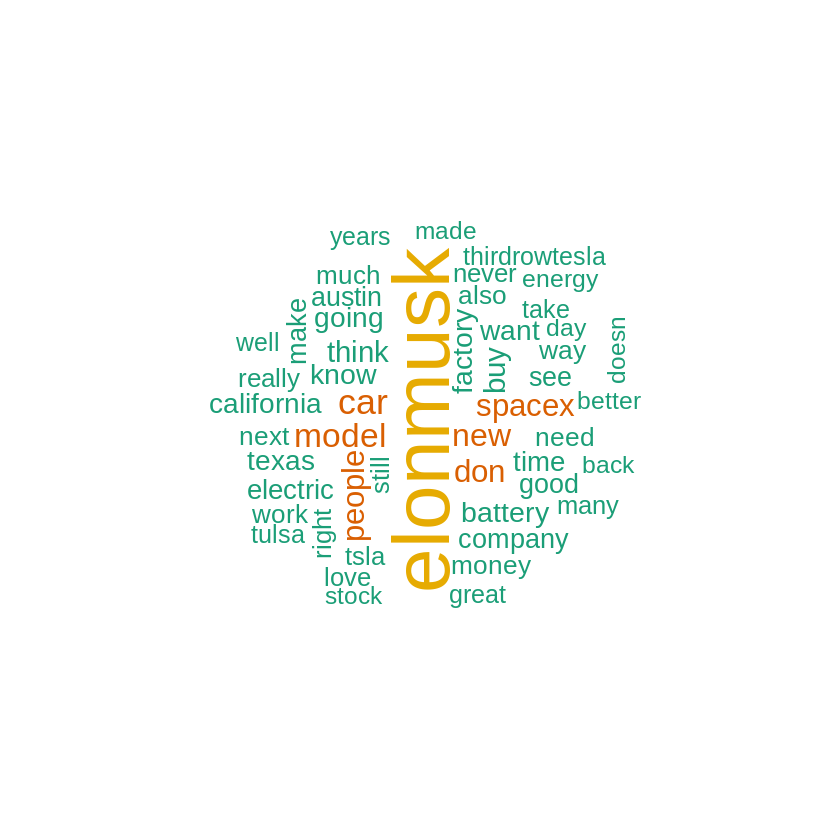

In [ ]:
# Create word cloud with 6 colors and max 50 words
wordcloud(corp_refined, max.words = 50, 
          colors = brewer.pal(6, "Dark2"), 
          scale=c(4,1), random.order = FALSE)

We now have an interesting word cloud depicting popular terms from tweets on Tesla positioned at the centre of the word cloud to highlight their relevance and importance.

One cn use word cloud as an effective promotional image for marketing campaigns as it communicates the brand messaging and highlights popular terms to convey the value of the content being shared.


## 5.	Sentiment analysis of tweets to understand customer's feelings and sentiments about a brand

Sentiment analysis is the process of retrieving information about a consumer's perception of a product or brand.

It is used to extract and quantify positive, negative, and neutral opinions as well as emotions like trust, joy, and anger from the text.

Customer perception of a brand is an important factor that influences purchasing decisions and sentiment analysis is useful to understand the pulse of what customers feel about a brand.

Steps involved in performing sentiment analysis:

i) Extract tweets on topic of interest

ii) Extract sentiment scores for the text using the `syuzhet()` package

iii) Plot the sentiment scores

iv) Visualize and interpret customer perception and emotions

In this exercise, we will explore customer's sentiments on Tesla through sentiment analysis. 


i) Extract tweets on topic of interest

We will use a smaller tweet dataset extracted from Twitter for this purpose.

In [ ]:
# Load a smaller dataset for tesla
tesladf_small <- read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesla_small.csv?raw=true", stringsAsFactors=FALSE)

In [ ]:
# Explore the tweet dataframe
dim(tesladf_small)
head(tesladf_small)

[1] 500  90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,⋯,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,1.423882e+09,1.262695e+18,2020-05-19T10:43:52Z,PayamSaderi,"Yesterday, Tesla CEO Elon Musk sent a tweet: “Take the red pill,” it read, and included a rose emoji. Shortly after that, Ivanka Trump retweeted it and added “Taken!”. Then, 'Matrix' co-creator Lilly Wachowski weighed in. Her reply? “Fuck both of you.” https://t.co/9EPLdDHuTj",Twitter Web App,140,NA,NA,,⋯,14526,15886,2013-05-12T19:27:06Z,FALSE,https://t.co/HLktm4kvkG,http://saderi.com,NA,https://pbs.twimg.com/profile_banners/1423881943/1413862714,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/865112558017028096/QbSYq4Z1_normal.jpg
2,2.996161e+09,1.262695e+18,2020-05-19T10:43:52Z,agusnox,@QTRResearch O'Leary used to like companies that are cash generating. Definitively not Tesla,Twitter Web App,79,1.262695e+18,1.469604e+09,QTRResearch,⋯,34458,50835,2015-01-24T17:01:53Z,FALSE,https://t.co/g5myTMfqFf,http://www.argenox.com,NA,https://pbs.twimg.com/profile_banners/2996161037/1578077829,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1240088633568346114/APbZkOqM_normal.jpg
3,2.996161e+09,1.262686e+18,2020-05-19T10:08:07Z,agusnox,"@montana_skeptic Exactly as we said: The big manufacturers were biding their time until the fines arrived, while Tesla was claiming it was dominant in an empty field. Like a little kid saying he beat Michael Jordan Now Jordan is playing for keeps https://t.co/87gWESowOU",Twitter Web App,231,1.262685e+18,1.203353e+18,montana_skeptic,⋯,34458,50835,2015-01-24T17:01:53Z,FALSE,https://t.co/g5myTMfqFf,http://www.argenox.com,NA,https://pbs.twimg.com/profile_banners/2996161037/1578077829,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1240088633568346114/APbZkOqM_normal.jpg
4,4.123313e+07,1.262695e+18,2020-05-19T10:43:44Z,hscholtz,Why these cars are Tesla’s biggest threat https://t.co/YzpwZmieEs,Twitter for iPhone,86,NA,NA,,⋯,148326,14364,2009-05-19T22:52:04Z,FALSE,https://t.co/23PELe6VSz,http://www.cmdlt.edu.ve,NA,,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/579116843081842688/xkiWH-yu_normal.jpg
5,3.846028e+08,1.262695e+18,2020-05-19T10:43:42Z,koolbash4,Tesla Full Self-Driving option cost rises by ~$1000 worldwide on July 1st. Order a Tesla online in less than 2 minutes at https://t.co/qJm9uPBCX5,Twitter for Android,140,NA,NA,,⋯,15110,10815,2011-10-04T00:18:03Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/384602781/1580819431,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1245277794986332160/GlfHwNJI_normal.jpg
6,1.192205e+18,1.262695e+18,2020-05-19T10:43:39Z,PinkEle31705153,"@FullyChargedShw @FullyChargedDan @bobbyllew @maddiemoate @Tesla @FlitBike @RaleighBikes_UK @ManMadeMoon Idle speculation on my part but should Austin TX 🐝 confirmed, I'm wondering how many may choose 2 up sticks &amp; decamp from Houston &amp; other fossil fuel based areas 2 clean, green ones for health of themselves &amp; their families.",Twitter Web App,236,1.262691e+18,7.709332e+17,FullyChargedShw,⋯,1040,1863,2019-11-06T22:21:49Z,FALSE,,,NA,,,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png


We can see that this dataset has 500 tweets on Tesla.

The `syuzhet()` package uses pre-defined sentiment libraries to calculate scores for various sentiments.

These libraries have been trained on several documents and scored based on the meaning or intent of words. For example, horrible has a negative meaning and awesome has a positive meaning.

When sentiment analysis is performed on a corpus, each relevant word is scored based on its nearness to a positive or negative word from the sentiment library.

In [ ]:
# Load the library syuzhet
install.packages('syuzhet')
library(syuzhet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘syuzhet’


The following object is masked from ‘package:rtweet’:

    get_tokens




ii) Extract sentiment scores from tweet text

The `get_nrc_sentiment()` function from the `syuzhet` package is used to extract sentiment scores for the text.

`get_nrc_sentiment(`) takes the column storing the tweet text as the argument.

In [ ]:
# Perform sentiment analysis for tweets on `Climate change` 
sa.value <- get_nrc_sentiment(tesladf_small$text)

In [ ]:
# View the sentiment scores for first 10 tweets
head(sa.value, 10)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,1,1,0,2
2,1,1,0,1,1,0,0,1,0,1
3,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,2
6,0,0,0,1,2,1,0,3,1,3
7,0,1,0,0,0,0,1,1,0,2
8,1,1,0,1,1,0,0,1,1,1
9,0,1,0,0,0,0,1,1,0,2


The sentiment scores for the first 10 records are displayed here with the rows and columns representing the tweets and the emotions respectively. 

The column values are the sentiment scores for the tweets against each emotion.

Get the sum of the sentiment scores for each emotion using `colSums()`. This function takes the extracted sentiment scores as input.

Convert the output to a dataframe.

In [ ]:
# Calculate sum of sentiment scores
score <- colSums(sa.value[,])

# Convert the sum of scores to a dataframe
score_df <- data.frame(score)

# View the dataframe
score_df

,score
,<dbl>
anger,146
anticipation,270
disgust,67
fear,149
joy,154
sadness,106
surprise,160
trust,330
negative,272


The aggregated scores for each sentiment is displayed here.

The score of 146 for anger indicates that 146 words in the corpus were classified under the emotion anger by the sentiment libraries.

Convert the rownames containing the sentiment heads into a column and use `cbind()` to combine this column with the sentiment scores.

Also, set the row names for this new dataframe to null.

In [ ]:
# Convert row names into 'sentiment' column and combine with sentiment scores
score_df2 <- cbind(sentiment = row.names(score_df),  
				  score_df, row.names = NULL)

# View the dataframe
print(score_df2)

      sentiment score
1         anger   146
2  anticipation   270
3       disgust    67
4          fear   149
5           joy   154
6       sadness   106
7      surprise   160
8         trust   330
9      negative   272
10     positive   727


We can now see a data frame with sentiments in one column and their respective scores in the second column.

iii) Plot the sentiment scores using `ggplot()`.

X-axis and Y-axis take the values sentiment and score respectively and fill is set to sentiment.

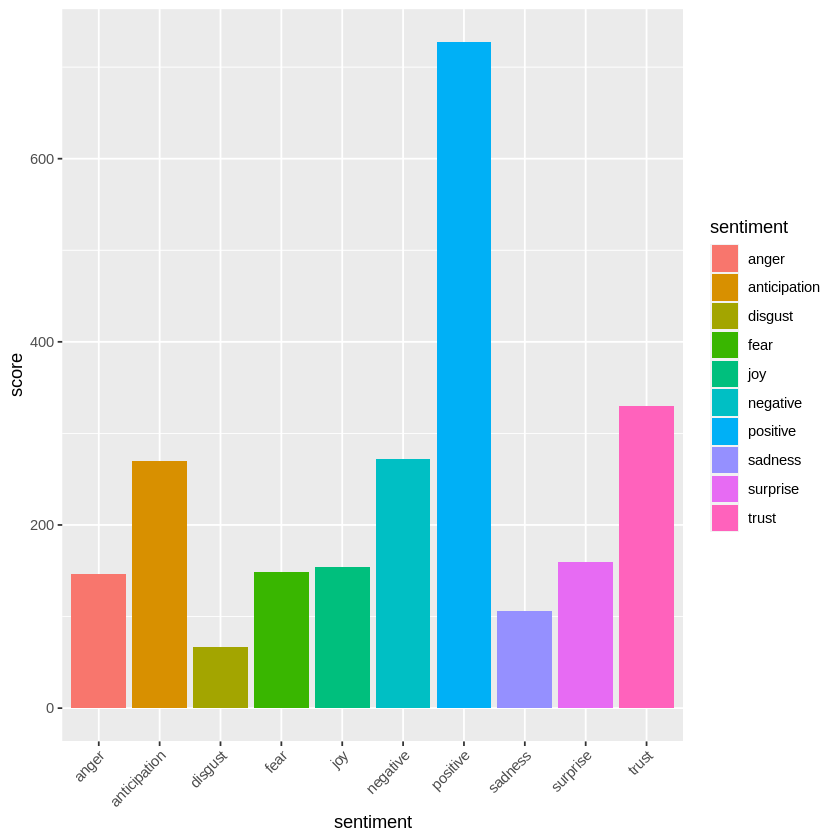

In [ ]:
# Plot the sentiment scores
ggplot(data = score_df2, aes(x = sentiment, y = score, fill = sentiment)) +
  	   geom_bar(stat = "identity") +
       theme(axis.text.x = element_text(angle = 45, hjust = 1))

iv) Visualize and interpret customer perception and emotions

It is interesting to see that the positive sentiments collectively outnumber the negative ones. The high score on positive emotions, trust, and anticipation augurs well for the brand.

Sentiment analysis is useful in social media monitoring since it gives an overview of people's sentiments.


## 6.	Visualize brand presence by plotting tweets on 'electric car' on the map

Twitter allows tweets to include geographic metadata indicating the location from where the tweet was authored.

Putting tweet location data on the map helps understand where the tweets are concentrated so people in those locations can be influenced by targeted marketing.

Twitter users can "geotag" a tweet when it is posted. When posted, they include a bounding box with longitude and latitude that define the location area ranging from a venue to an entire region.

It would be interesting to visualize tweets on the subject 'electric car' by plotting their tweet locations on the map.

Note:
The main drawback here is that only 1-2% of tweets are geo-tagged.

For this exercise, we will use pre-extracted tweets on 'electric car' available in CSV format. These tweets have been extracted using `search_tweets()` as shown below.



In [ ]:
# Extract tweets on 'electric car' from Twitter
#tweets_car = search_tweets("electric car", include_rts = TRUE, n = 18000)
#fwrite(tweets_car, "tweets_car.csv")

# Load tweets in csv format into a dataframe
tweets_car <- read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tweets_car.csv?raw=true")

In [ ]:
# Explore the tweet dataframe
dim(tweets_car)
head(tweets_car)

[1] 12925    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,3406918337,1.269941e+18,2020-06-08T10:35:27Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/Uv5MbLlMFh https://t.co/ljpZzrRZZT,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
2,3406918337,1.267404e+18,2020-06-01T10:35:18Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/JHoGAgjydp https://t.co/nyzJ9vSpEm,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
3,3406918337,1.268127e+18,2020-06-03T10:26:49Z,SpecialistSEAT,"#Change looks good. The new SEAT #Mii electric was voted WhatCar? 'Small Electric Car Of The Year under £25,000'. #Follow the link to learn more about its unique features. https://t.co/4Jnld6RZgr https://t.co/ags6br4nqY",CrowdControlHQ,195,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
4,3406918337,1.268129e+18,2020-06-03T10:35:59Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/2Eem5rXwqH https://t.co/6cwci9q4gl,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
5,3406918337,1.268854e+18,2020-06-05T10:36:18Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/RMSynH6Ol7 https://t.co/XS3rHa14Ao,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
6,3406918337,1.267402e+18,2020-06-01T10:26:27Z,SpecialistSEAT,"#Change looks good. The new SEAT #Mii electric was voted WhatCar? 'Small Electric Car Of The Year under £25,000'. #Follow the link to learn more about its unique features. https://t.co/sol38eYGUJ https://t.co/EBX0NVqPeo",CrowdControlHQ,195,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg


The dataframe has 12925 tweets and 90 columns.

The `lat_lng()` function from the `rtweet` library extracts the geolocation data from the tweets where available. 

The coordinates are picked up from the columns, `coords_coords` or `bbox_coords`.

The function stores the extracted location data in two new columns, `lat` and `lng`, in the same dataframe.

In [ ]:
# Extract geo-coordinates data to append as new columns
car_coord <- lat_lng(tweets_car)

# View the columns with geo-coordinates for first 20 tweets
head(car_coord[c("lat","lng")], 20)

lat,lng
<dbl>,<dbl>
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA


We can see `NA` values for the first 20 records in the dataframe. 

This is because only some rows are populated with the geolocation coordinates in the columns `lat` and `lng`. 

Note that the availability of geolocation coordinates depends on users tagging location details when they tweet.

Omit rows that have NA values in the `lat` and `lng` columns using the `na.omit()` function.

In [ ]:
# Omit rows with missing geo-coordinates in the data frame
car_geo <- na.omit(car_coord[, c("lat", "lng")])

# View the output
head(car_geo)

lat,lng
<dbl>,<dbl>


We now have only those tweets that have geo-coordinates available in the `lat` and `lng` columns.

The `map()` function from the `maps` library is used along with the `with()` function to plot the longitude and latitude values of tweets on the world map.

In [ ]:
# Load the library maps
library(maps)

The `map()` function takes the following arguments to load a world map:

`database` set to "world", `fill` set to "TRUE" to draw country borders, and `col` set to "light yellow".

The `with()` function helps plot the latitude and longitude values present in `lat` and `lng` columns on the world map.

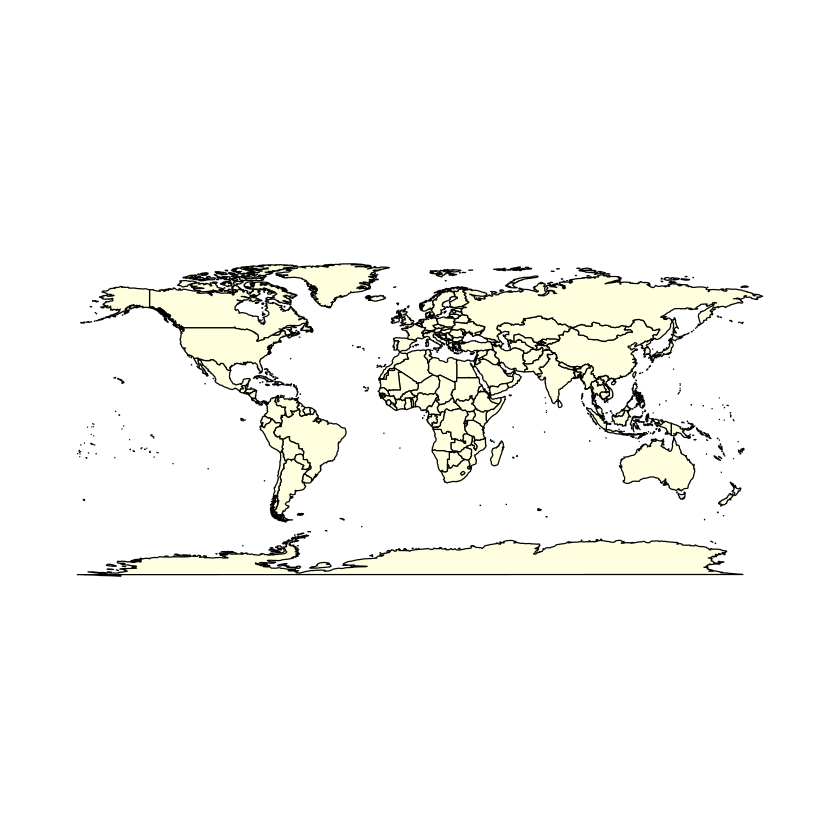

In [ ]:
# Plot longitude and latitude values of tweets on the world map
map(database = "world", fill = TRUE, col = "light yellow")
with(car_geo, points(lng, lat, pch = 20, cex = 1, col = 'blue'))

The plot shows higher tweet activity on electric car in the US, western Europe, and parts of Africa.

Analyzing the geolocation of tweets on electric car helps influence customers with targeted marketing. A brand promoting electric car or associated products can target people in these regions for their marketing. 

